In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

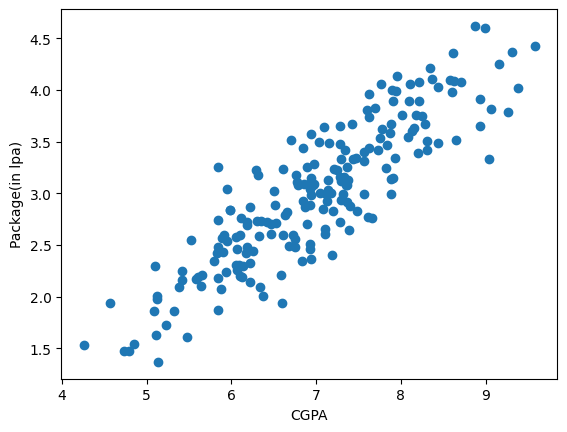

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]

In [ ]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

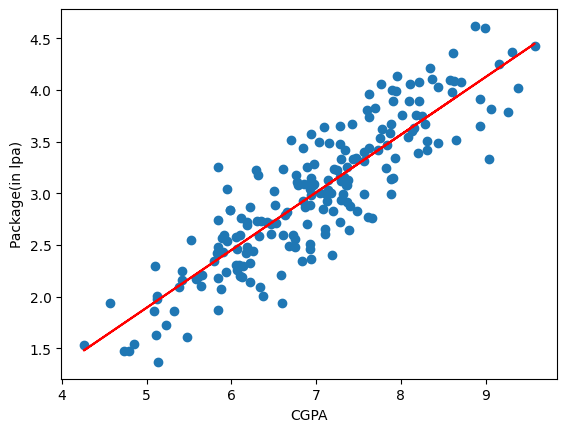

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
print("MAE",mean_absolute_error(Y_test,Y_pred))

MAE 0.2884710931878175


In [ ]:
print("MSE",mean_squared_error(Y_test,Y_pred))

MSE 0.12129235313495527


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 0.34827051717731616


In [ ]:
R2 = r2_score(Y_test,Y_pred)
print("R2 score",R2)

R2 score 0.780730147510384


In [ ]:
X_test.shape

(40, 1)

In [ ]:
1 - ((1-R2)*(40-1)/(40-1-1))

0.7749598882343415

# Testing with an unnecessary column

In [ ]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.414422,3.26
1,5.12,0.585677,1.98
2,7.82,0.287096,3.25
3,7.42,0.895440,3.67
4,6.94,0.103527,3.57


Text(0, 0.5, 'Package(in lpa)')

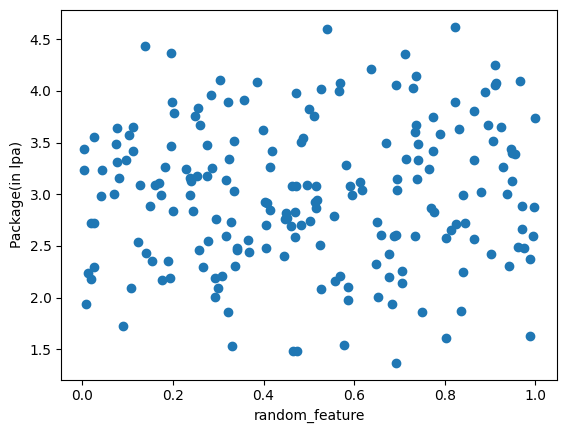

In [ ]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [ ]:
X = new_df1.iloc[:,0:2]
Y = new_df1.iloc[:,-1]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=6)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
R2 = r2_score(Y_test,Y_pred)
print("R2 score",R2)

R2 score 0.7912939214213048


In [ ]:
1 - ((1-R2)*(40-1)/(40-1-2))

0.7668100751595994

In [ ]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [ ]:
new_df2.sample(5)

,cgpa,iq,package
183,7.28,1.92,2.72
182,5.88,2.58,2.08
169,9.31,3.27,4.37
13,6.93,3.69,2.89
157,6.47,2.70,2.70


Text(0, 0.5, 'Package(in lpa)')

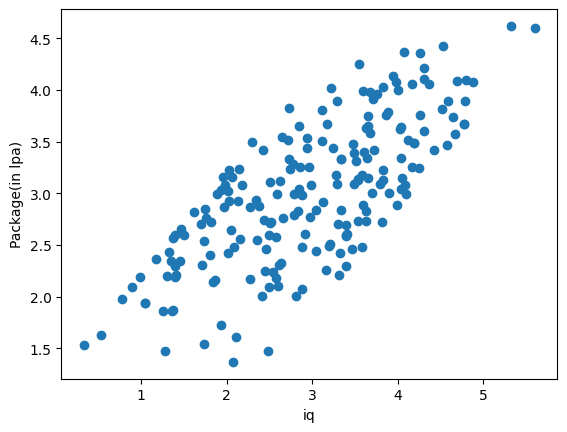

In [ ]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [ ]:
X = new_df2.iloc[:,0:2]
Y = new_df2.iloc[:,-1]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
R2 = r2_score(Y_test,Y_pred)
print("R2 score",R2)

R2 score 0.8537750963207057


In [ ]:
1 - ((1-R2)*(40-1)/(40-1-2))

0.8458710474731763